In [1]:
# 1. Import libraries and modules
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

In [2]:
# Load pre-shuffled HODA data into train and test sets
X_train, y_train, X_test, y_test = load_hoda(
                                            training_sample_size=3500,
                                            test_sample_size=400,size=32)

# reshape

In [3]:

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
X_train_32 = X_train.reshape(-1,32,32,1)
X_test_32 = X_test.reshape(-1,32,32,1)
X_train_32.shape

(3500, 32, 32, 1)

In [4]:
import cv2
import numpy as np

In [5]:
X_train_28 = np.zeros((X_train_32.shape[0], 28, 28, 1))
for i in range(X_train_32.shape[0]):
    # Resize the sample from shape (32, 32, 1) to shape (28, 28, 1) using OpenCV
    resized_sample = cv2.resize(X_train_32[i], (28, 28), interpolation=cv2.INTER_AREA)
    # Assign the resized sample to the corresponding index in the new numpy array
    X_train_28[i] = resized_sample.reshape((28, 28, 1))

X_test_28 = np.zeros((X_test_32.shape[0], 28, 28, 1))
for i in range(X_test_32.shape[0]):
    # Resize the sample from shape (32, 32, 1) to shape (28, 28, 1) using OpenCV
    resized_sample = cv2.resize(X_test_32[i], (28, 28), interpolation=cv2.INTER_AREA)
    # Assign the resized sample to the corresponding index in the new numpy array
    X_test_28[i] = resized_sample.reshape((28, 28, 1))

In [6]:
import matplotlib.pyplot as plt

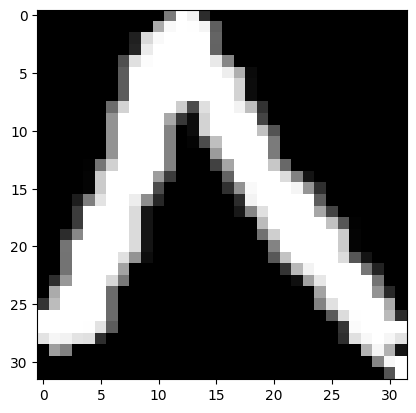

In [7]:
plt.imshow(X_test_32[0][:,:,0], cmap='gray')

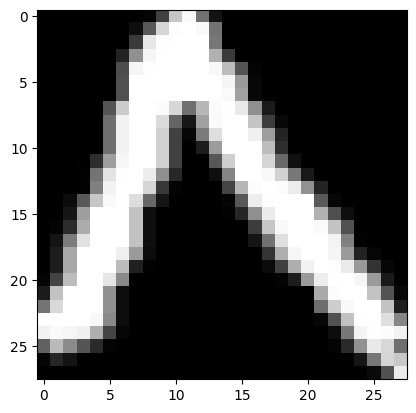

In [8]:
plt.imshow(X_test_28[0][:,:,0], cmap='gray')

In [9]:
# Preprocess input data
'''normalize our data values to the range [0, 1]'''
X_train_32 = X_train_32.astype('float32')
X_test_32 = X_test_32.astype('float32')
X_train_32 /= 255
X_test_32 /= 255

# Preprocess input data
'''normalize our data values to the range [0, 1]'''
X_train_28 = X_train_28.astype('float32')
X_test_28 = X_test_28.astype('float32')
X_train_28 /= 255
X_test_28 /= 255


In [10]:

# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


# 1st senario

In [11]:
# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# 7. Fit model on training data
history = model.fit(X_train_28, y_train,
          epochs=200, batch_size=256, validation_split=0.2)





Epoch 1/200


11/11 [==============================] - 2s 74ms/step - loss: 2.1711 - accuracy: 0.2493 - val_loss: 1.8325 - val_accuracy: 0.5186
Epoch 2/200
11/11 [==============================] - 0s 40ms/step - loss: 1.5869 - accuracy: 0.4682 - val_loss: 0.9635 - val_accuracy: 0.7329
Epoch 3/200
11/11 [==============================] - 0s 45ms/step - loss: 1.0861 - accuracy: 0.6204 - val_loss: 0.6032 - val_accuracy: 0.8243
Epoch 4/200
11/11 [==============================] - 0s 37ms/step - loss: 0.8342 - accuracy: 0.7082 - val_loss: 0.4531 - val_accuracy: 0.8671
Epoch 5/200
11/11 [==============================] - 1s 45ms/step - loss: 0.6650 - accuracy: 0.7761 - val_loss: 0.3773 - val_accuracy: 0.8771
Epoch 6/200
11/11 [==============================] - 0s 38ms/step - loss: 0.5754 - accuracy: 0.8136 - val_loss: 0.3036 - val_accuracy: 0.9043
Epoch 7/200
11/11 [==============================] - 0s 39ms/step - loss: 0.4931 - accuracy: 0.8436 - val_loss: 0.2423 - val_accuracy: 0.9129
E

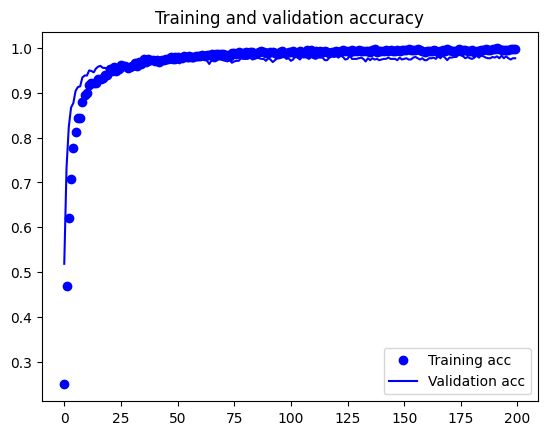

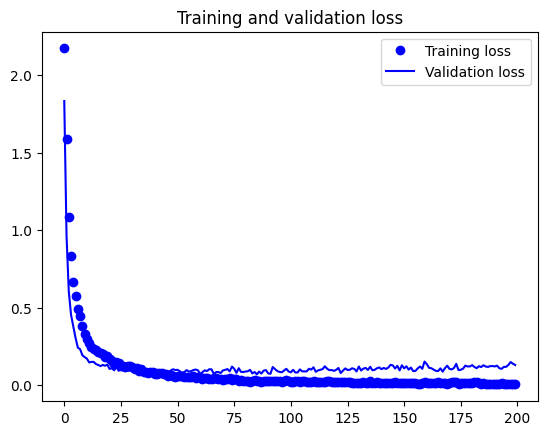

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
model.evaluate(X_test_28, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 0.0710 - accuracy: 0.9825


[0.07099016010761261, 0.9825000166893005]

Can you feed data with different dimention (such as 32x32)?

In [14]:
model.evaluate(X_test_32, y_test)

InvalidArgumentError: Graph execution error:

Detected at node sequential/dense/Relu defined at (most recent call last):
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code

  File "C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1041, in launch_instance

  File "C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 711, in start

  File "C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue

  File "C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 499, in process_one

  File "C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell

  File "C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 411, in do_execute

  File "C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 530, in run_cell

  File "C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell

  File "C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell

  File "C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async

  File "C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes

  File "C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code

  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8408\3164611343.py", line 1, in <module>

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2296, in evaluate

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 4108, in run_step

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2066, in test_function

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2049, in step_function

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2037, in run_step

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1917, in test_step

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py", line 255, in call

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\activations.py", line 306, in relu

  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py", line 5395, in relu

Matrix size-incompatible: In[0]: [32,1024], In[1]: [576,64]
	 [[{{node sequential/dense/Relu}}]] [Op:__inference_test_function_19268]

No! you cannot! It raises "Matrix size-incompatible" Error,
because we have used FC layers with **Flatten**

## solution?!

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [16]:
# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.GlobalAveragePooling2D()) # the solution
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))



In [ ]:
model.predict(X_train_32[:5])
model.summary()

In [ ]:
# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# 7. Fit model on training data
history = model.fit(X_train_28, y_train,
          epochs=80, batch_size=256, validation_split=0.2)


## lets evaluate it with 28x28

In [ ]:
model.evaluate(X_test_28, y_test)

## Now try it with different size!!!!

In [ ]:
model.evaluate(X_test_32, y_test)